In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Spotify/spotify_songs.csv")

# Data cleaning
# Remove row with the same track id (same song)
df.drop_duplicates(inplace=True, subset='track_id')

In [31]:
# 1. Mencari statistik dasar dari kolom popularitas, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms

print(df['track_popularity'].describe())
print(df['danceability'].describe())
print(df['energy'].describe())
print(df['loudness'].describe())
print(df['speechiness'].describe())
print(df['acousticness'].describe())
print(df['instrumentalness'].describe())
print(df['liveness'].describe())
print(df['valence'].describe())
print(df['tempo'].describe())
print(df['duration_ms'].describe())

count    28356.000000
mean        39.329771
std         23.702376
min          0.000000
25%         21.000000
50%         42.000000
75%         58.000000
max        100.000000
Name: track_popularity, dtype: float64
count    28356.000000
mean         0.653372
std          0.145785
min          0.000000
25%          0.561000
50%          0.670000
75%          0.760000
max          0.983000
Name: danceability, dtype: float64
count    28356.000000
mean         0.698388
std          0.183503
min          0.000175
25%          0.579000
50%          0.722000
75%          0.843000
max          1.000000
Name: energy, dtype: float64
count    28356.000000
mean        -6.817696
std          3.036243
min        -46.448000
25%         -8.309250
50%         -6.261000
75%         -4.709000
max          1.275000
Name: loudness, dtype: float64
count    28356.000000
mean         0.107954
std          0.102556
min          0.000000
25%          0.041000
50%          0.062600
75%          0.133000
max     

In [32]:
# 2. Mencari rentang waktu dari lagu yang ada di dataset

# Cari lagu dengan release date terlama dan terbaru
oldest_song = df['track_album_release_date'].min()
newest_song = df['track_album_release_date'].max()
print("Lagu dengan release date terlama: ", oldest_song)
print("Lagu dengan release date terbaru: ", newest_song)

Lagu dengan release date terlama:  1957-01-01
Lagu dengan release date terbaru:  2020-01-29


                     track_id           track_name    track_artist  \
1551   2XU0oxnq2qxCpomAAuJY8K         Dance Monkey     Tones and I   
20092  696DnlkuDOXcMAnKlTgXXK              ROXANNE  Arizona Zervas   
5508   0nbXyq5TXYPCO7pr3N8S4I              The Box     Roddy Ricch   
687    7k4t7uLgtOxPwTpFmtJNTY                 Tusa         KAROL G   
711    2b8fOow8UzyDFAE27YhOZM             Memories        Maroon 5   
1301   21jGcNKet2qwijlDFuPiPb              Circles     Post Malone   
716    0sf12qNH5qcw8qpgymFOqD      Blinding Lights      The Weeknd   
1302   6WrI0LAC5M1Rw2MnX2ZvEg      Don't Start Now        Dua Lipa   
689    3ZCTVFBt2Brf31RLEnCkWJ  everything i wanted   Billie Eilish   
3155   4TnjEaWOeW0eKTKIEvJyCa              Falling   Trevor Daniel   

       track_popularity  
1551                100  
20092                99  
5508                 98  
687                  98  
711                  98  
1301                 98  
716                  98  
1302                 

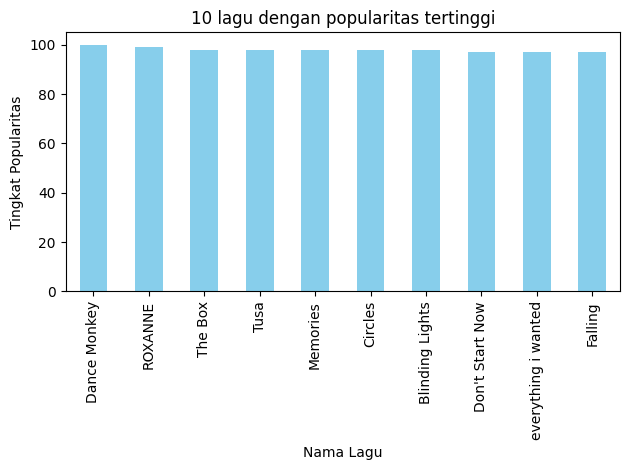

In [33]:
# 3. 10 lagu dengan popularitas tertinggi
sorted_data = df.sort_values(by='track_popularity', ascending = False)# Mengubah urutan lagu dari yang paling tinggi ke paling rendah
top_10_songs = sorted_data.head(10)

print(top_10_songs[['track_id', 'track_name', 'track_artist', 'track_popularity']])

top_10_songs.plot(kind='bar', x='track_name', y='track_popularity', color='skyblue', legend=False, xlabel='Nama Lagu', ylabel="Tingkat Popularitas", title='10 lagu dengan popularitas tertinggi')
plt.tight_layout()

track_album_release_date
1957     59
1958     73
1960     25
1961     47
1962     64
       ... 
2016     86
2017     88
2018     97
2019    100
2020     95
Name: track_popularity, Length: 63, dtype: int64


<Axes: title={'center': 'Popularitas Lagu Tertinggi per Tahun'}, xlabel='Tahun', ylabel='Popularitas'>

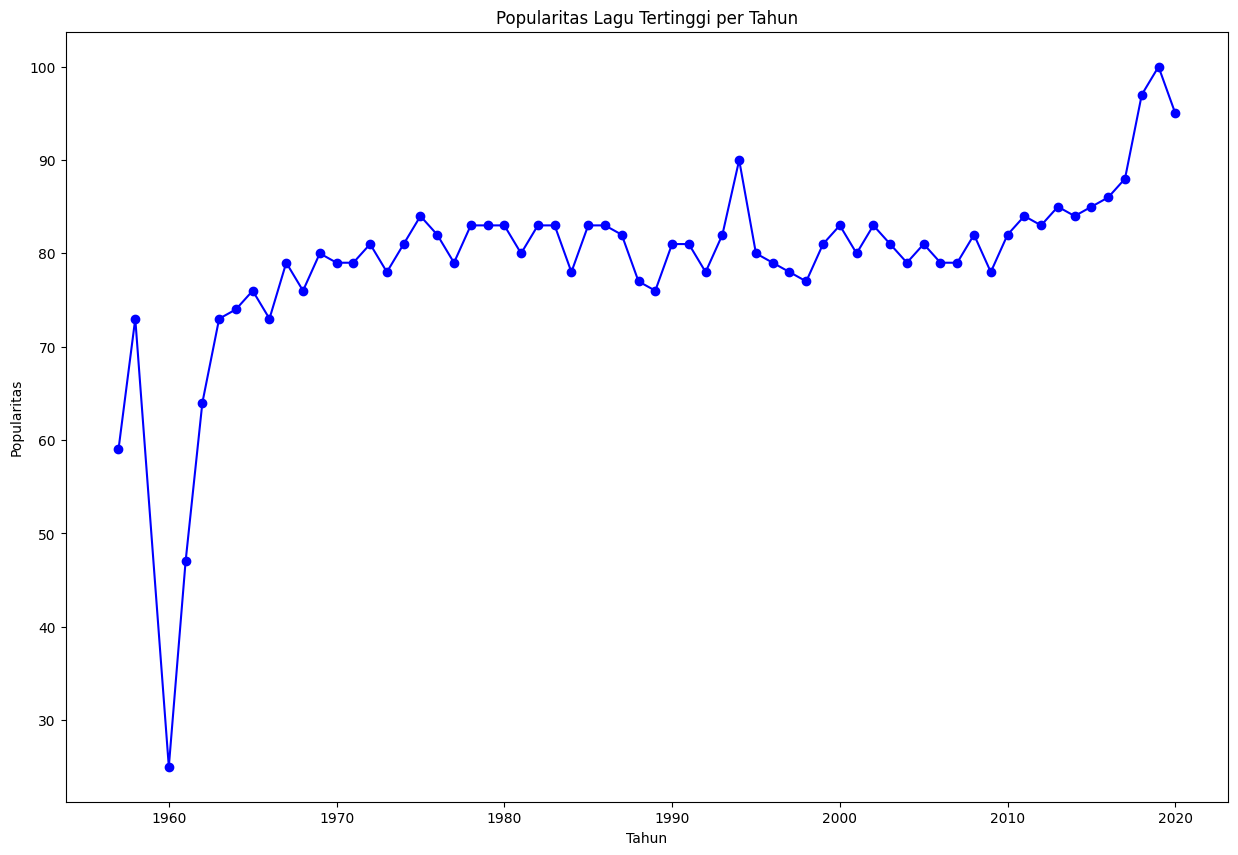

In [34]:
# 4. Mencari popularitas tertinggi untuk setiap tahun rilis

# Extract tahun dari track_album_release_date
year = pd.DatetimeIndex(df['track_album_release_date']).year

# Popularitas tertinggi untuk setiap tahun rilis
popularity_per_year = df.groupby(year)['track_popularity'].max()
print(popularity_per_year)

# Plot dengan grafik garis
popularity_per_year.plot(kind='line', title='Popularitas Lagu Tertinggi per Tahun', xlabel='Tahun', ylabel='Popularitas', marker='o', figsize=(15, 10), color='blue')

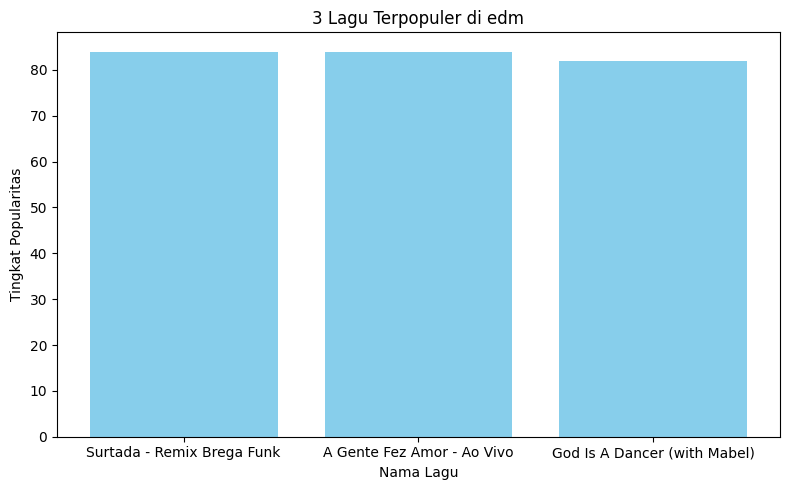

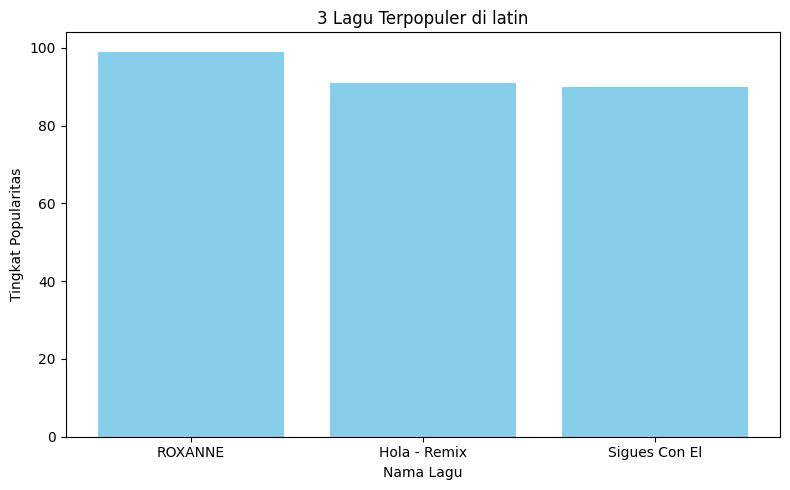

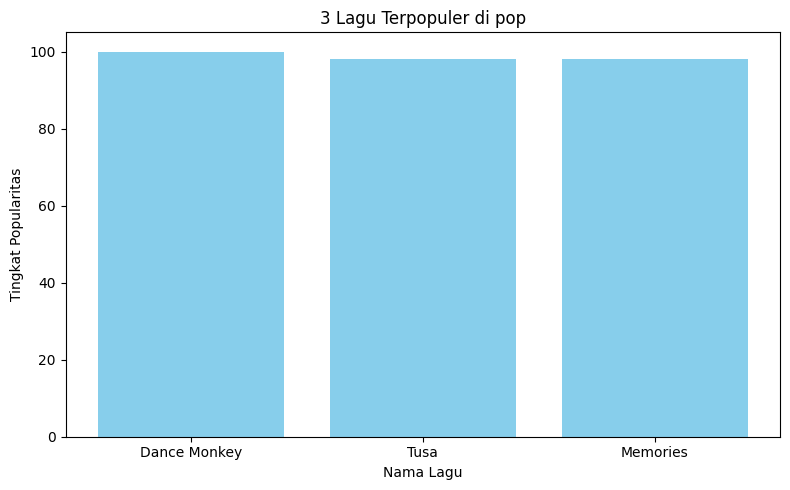

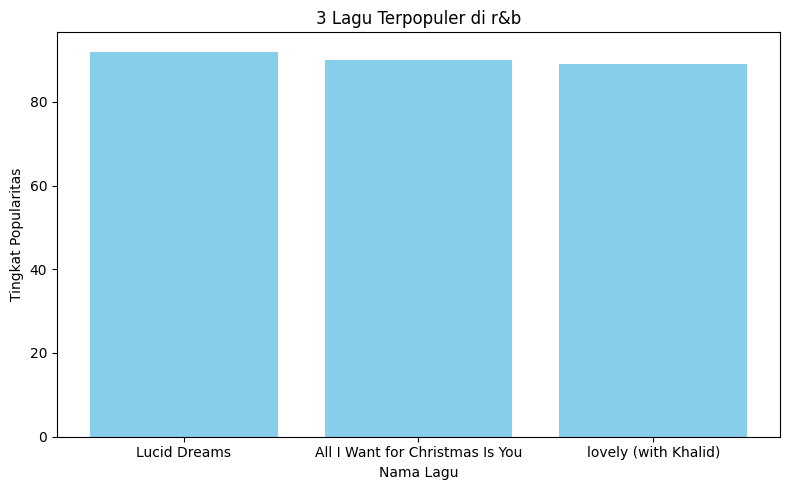

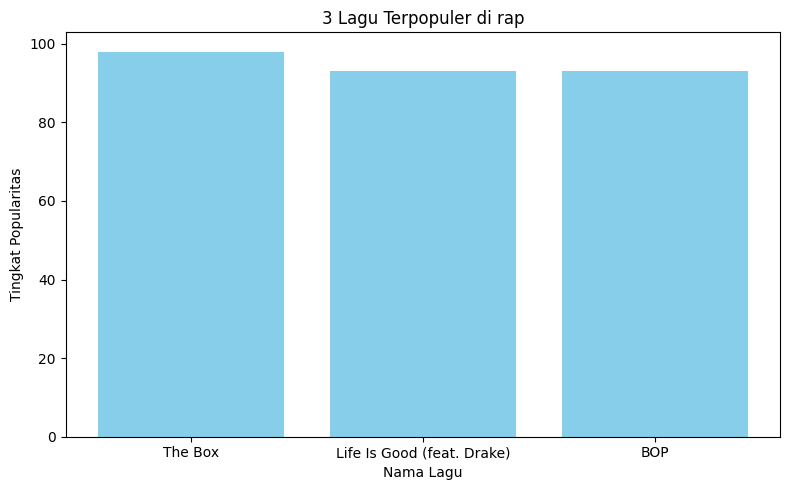

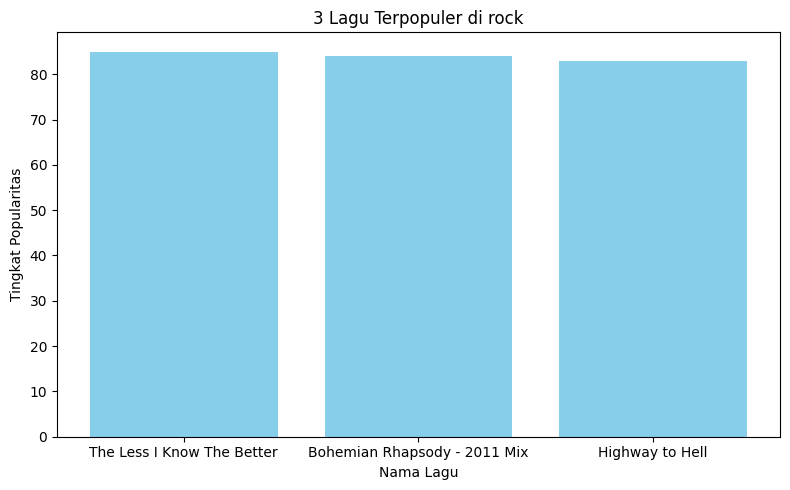

In [35]:
# 5. 3 Lagu terpopuler tiap genre
top_songs_by_genre = df.groupby('playlist_genre').apply(lambda x: x.nlargest(3, 'track_popularity'))

# Membuat diagram batang untuk setiap genre
for playlist_genre, songs in top_songs_by_genre.groupby(level=0):
    plt.figure(figsize=(8, 5))
    plt.bar(songs['track_name'], songs['track_popularity'], color='skyblue')
    plt.xlabel('Nama Lagu')
    plt.ylabel('Tingkat Popularitas')
    plt.title(f'3 Lagu Terpopuler di {playlist_genre}')
    plt.tight_layout()
    plt.show()

playlist_genre
rock    66
pop      6
r&b      4
edm      1
Name: count, dtype: int64
playlist_genre
r&b      73
rock     39
latin    16
pop      16
rap      13
edm       1
Name: count, dtype: int64
playlist_genre
r&b      88
rock     63
rap      52
latin    14
pop       9
edm       4
Name: count, dtype: int64
playlist_genre
pop      171
rock     113
latin    103
rap       70
r&b       70
edm       31
Name: count, dtype: int64
playlist_genre
pop      165
rap      152
edm      113
latin     94
r&b       61
rock      41
Name: count, dtype: int64


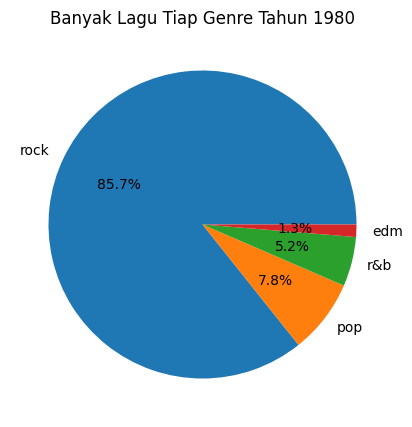

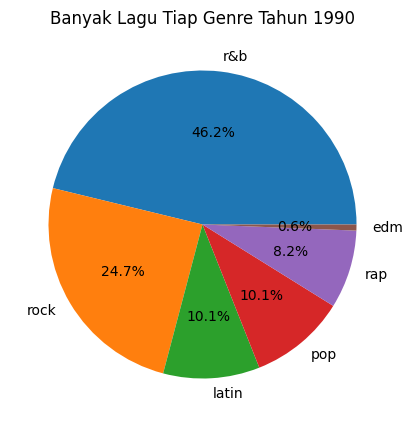

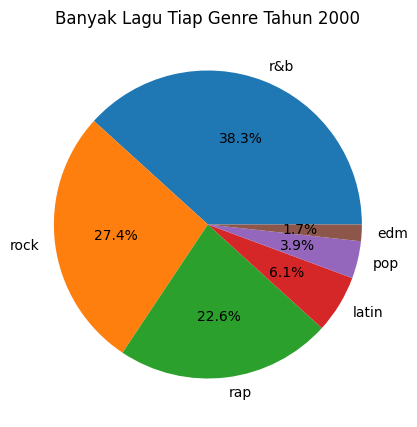

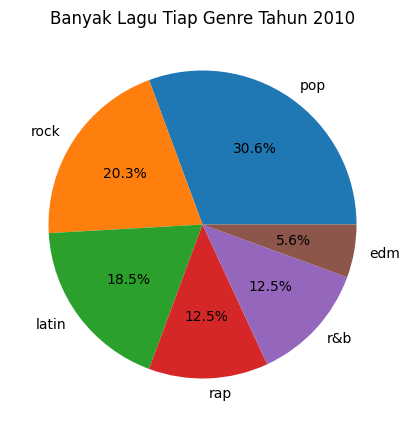

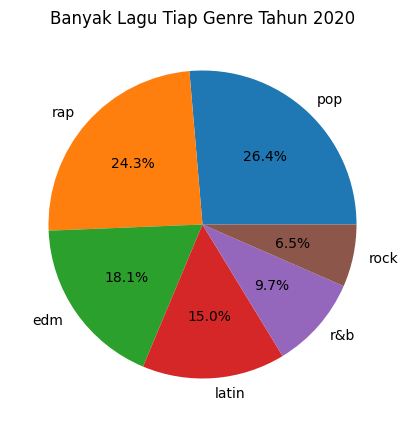

In [36]:
# 6. Banyak lagu tiap genre dalam satu tahun rilis (1980, 1990, 2000, 2010, 2020)
for i in range(1980,2021,10):
    chart = df[year == i]['playlist_genre'].value_counts()
    print(chart)
    plt.figure(figsize=(5,5))
    plt.pie(chart, autopct='%1.1f%%', labels=chart.index)
    plt.title(f'Banyak Lagu Tiap Genre Tahun {i}')
    # chart.plot(kind='pie', title=f'Banyak Lagu Tiap Genre Tahun {i}', figsize=(15, 10), autopct='%1.1f%%')

Korelasi antara danceability dan track_popularity: 
0.04659650695807928
Korelasi antara energy dan track_popularity: 
-0.10362202303010219
Korelasi antara loudness dan track_popularity: 
0.03728515399684958
Korelasi antara speechiness dan track_popularity: 
0.0052055087151887955
Korelasi antara liveness dan track_popularity: 
-0.05277302913225213
Korelasi antara valence dan track_popularity: 
0.02258132865297906
Korelasi antara tempo dan track_popularity: 
0.004446180266067328
Korelasi antara duration_ms dan track_popularity: 
-0.13968178319829425


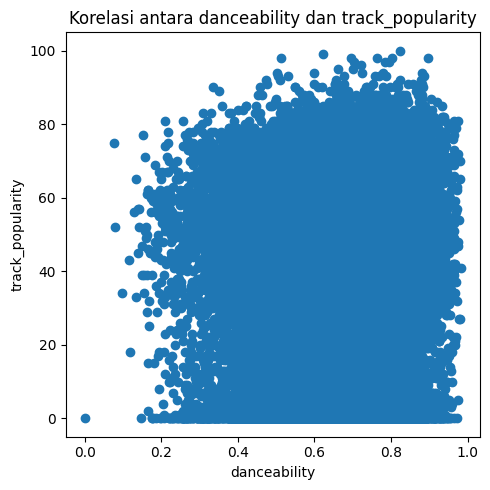

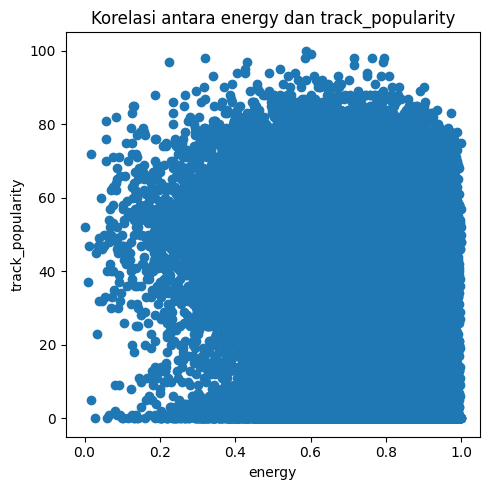

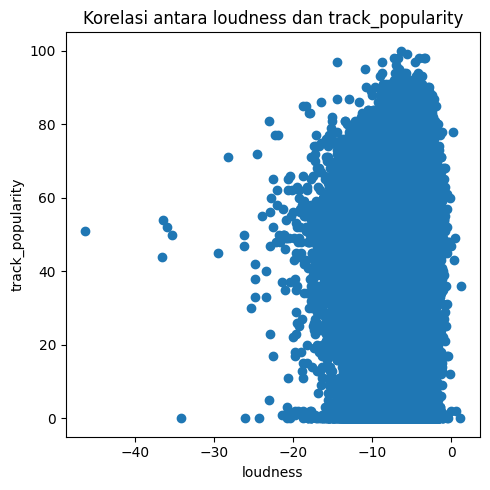

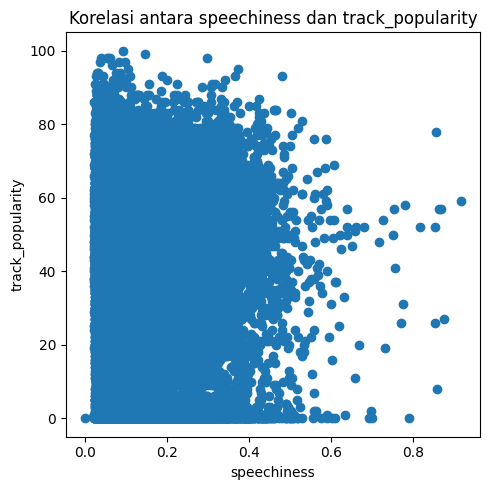

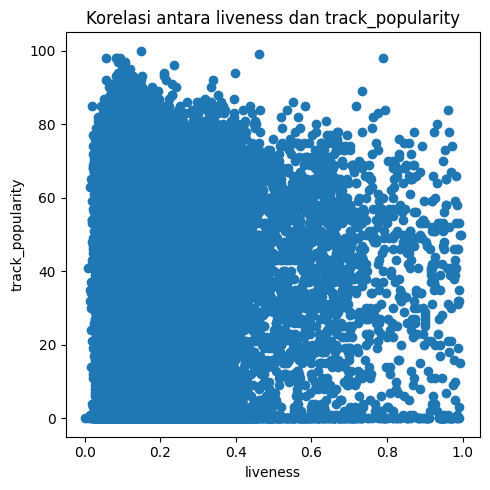

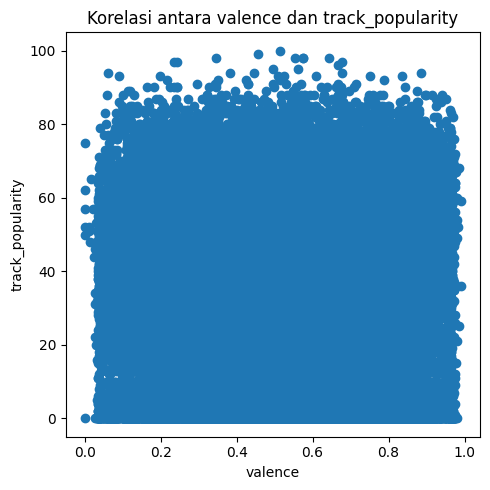

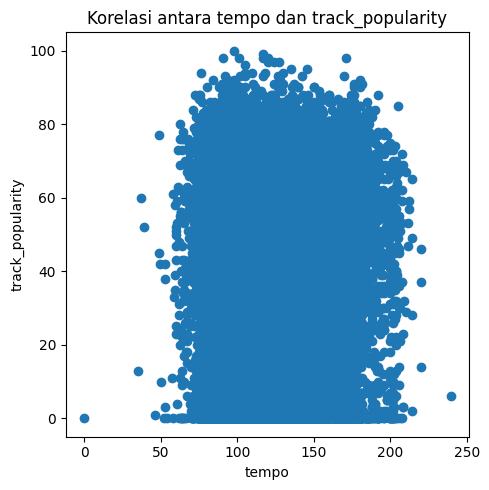

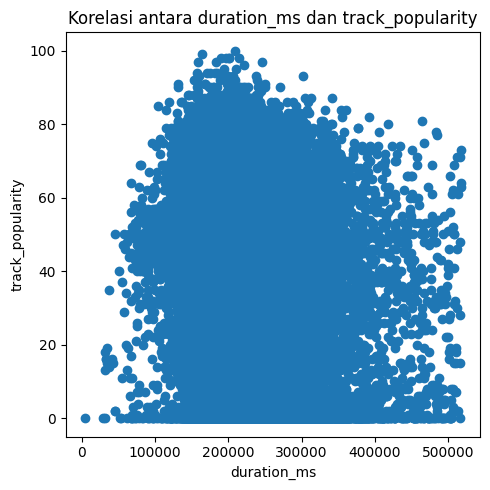

In [37]:
# 7. Korelasi antara kolom popularitas, danceability, energy, loudness, speechiness, liveness, valence, tempo, duration_ms
kolom = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'liveness', 'valence', 'tempo', 'duration_ms']

# plot dengan scatter plot
for kolom in kolom:
    if kolom == 'track_popularity':
        continue
    corr = df[kolom].corr(df['track_popularity'])
    print(f'Korelasi antara {kolom} dan track_popularity: ')
    print(corr)
    plt.figure(figsize=(5,5))
    plt.scatter(df[kolom], df['track_popularity'])
    plt.xlabel(kolom)
    plt.ylabel('track_popularity')
    plt.title(f'Korelasi antara {kolom} dan track_popularity')
    plt.tight_layout()
